# Movie Collection Analysis

## Load packages

In [65]:
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

%matplotlib inline

## Load files

In [37]:
# load csv files as dataframes
df_writer = pd.read_csv("Movie_Writer.csv")
df_actor = pd.read_csv("Movie_Actors.csv")
df_rating = pd.read_csv("Movie_AdditionalRating.csv")
df_movie = pd.read_csv("Movie_Movies.csv")
df_genre = pd.read_csv("Movie_Genres.csv")

## Data Exploration and Cleaning for importing data into SQL
First I do a very simple exploratory analysis to understand how all the data is structued and related and I also clean the data in order to put the data into SQL

#### Dimensionality Check

In [38]:
for i in [df_writer, df_actor, df_rating, df_movie, df_genre]:
    print(i.shape)

(66164, 4)
(143869, 3)
(92016, 4)
(178687, 18)
(308565, 3)


#### Movie_Writer.csv Data

In [39]:
df_writer.head()

,Unnamed: 0,Person,Responsibility,imdbID
0,0,Ernest Vajda,story,tt0016750
1,1,Ben F. Wilson,scenario,tt0328410
2,2,Sam-yuk Yoon,screenplay,tt0366512
3,3,Judy Rothman Rofé,screenplay,tt0206367
4,4,E.B. White,book,tt0206367


In [40]:
df_writer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66164 entries, 0 to 66163
Data columns (total 4 columns):
Unnamed: 0        66164 non-null int64
Person            66164 non-null object
Responsibility    66164 non-null object
imdbID            66164 non-null object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


Remove **"Unnamed: 0"** Column.

In [41]:
df_writer.drop("Unnamed: 0", axis = 1, inplace = True)

Save the cleaned file as **csv file** again.

In [42]:
df_writer.to_csv("movie_writer_2.csv", index=False)

#### Movie_Actors

In [43]:
df_actor.head()

,Unnamed: 0,Actors,imdbID
0,0,Cass Barbera,tt2268369
1,2,Charles A. Post,tt0016750
2,3,Samuel Green,tt3405286
3,4,Surin Mendis,tt3816698
4,7,Baby Rube,tt0328410


In [44]:
df_actor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143869 entries, 0 to 143868
Data columns (total 3 columns):
Unnamed: 0    143869 non-null int64
Actors        143869 non-null object
imdbID        143869 non-null object
dtypes: int64(1), object(2)
memory usage: 3.3+ MB


Remove **"Unnamed: 0"** Column.

In [45]:
df_actor.drop("Unnamed: 0", axis = 1, inplace = True)

Save the cleaned file as **csv file** again.

In [46]:
df_actor.to_csv("movie_actor_2.csv", index=False)

#### Movie_AdditionalRating

In [47]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 4 columns):
Unnamed: 0      92016 non-null int64
Rating          92016 non-null object
RatingSource    92016 non-null object
imdbID          92016 non-null object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [48]:
df_rating.head()

,Unnamed: 0,Rating,RatingSource,imdbID
0,0,6.9/10,Internet Movie Database,tt1006835
1,1,2.4/10,Internet Movie Database,tt2554714
2,2,6.3/10,Internet Movie Database,tt1090670
3,3,5.5/10,Internet Movie Database,tt1990255
4,4,5.0/10,Internet Movie Database,tt0206367


Remove **"Unnamed: 0"** Column.

In [49]:
df_rating.drop("Unnamed: 0", axis = 1, inplace = True)

Save the cleaned file as **csv file** again.

In [50]:
df_rating.to_csv("movie_rating_2.csv", index=False)

#### Movie_Movies

In [51]:
df_movie.head(7)

,Awards,Country,DVD,Director,Language,Plot,Poster,Production,Rated,Released,Runtime,Title,Type,Website,Year,imdbID,imdbRating,imdbVotes
0,NaN,USA,NaN,Rose Cummings,English,Rachel constantly hears her baby cry from the ...,NaN,NaN,NaN,26 Apr 2012,20 min,Baby's Breath,movie,NaN,2012,tt2268369,NaN,NaN
1,NaN,USA,NaN,James Byrne,NaN,The struggle against unfortunate circumstances...,NaN,NaN,NaN,NaN,9 min,Winter Trees,movie,NaN,2008,tt1560760,NaN,NaN
2,NaN,USA,NaN,Dimitri Buchowetzki,NaN,NaN,NaN,NaN,NaN,27 Mar 1926,50 min,The Crown of Lies,movie,NaN,1926,tt0016750,NaN,NaN
3,NaN,USA,NaN,Julia Hechler,English,"A Gift introduces Samuel Green, Washington Sta...",NaN,NaN,NaN,27 May 2013,2 min,A Gift,movie,NaN,2013,tt3405286,NaN,NaN
4,NaN,Sri Lanka,NaN,Udara Siriruwan,Sinhalese,NaN,NaN,NaN,NaN,20 Mar 2014,23 min,Journey,movie,NaN,2014,tt3816698,NaN,NaN
5,NaN,USA,NaN,Malini Schueller,English,When heavily armed campus police broke into th...,NaN,NaN,NaN,NaN,42 min,In His Own Home,movie,NaN,2014,tt3645730,NaN,NaN
6,NaN,UK,NaN,Philip Shaw,English,Exploring lives affected after the 23 years Wa...,NaN,NaN,NaN,NaN,12 min,After War,movie,NaN,2009,tt1837501,NaN,NaN


In [52]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178687 entries, 0 to 178686
Data columns (total 18 columns):
Awards        20340 non-null object
Country       165998 non-null object
DVD           15949 non-null object
Director      151353 non-null object
Language      153196 non-null object
Plot          97476 non-null object
Poster        48414 non-null object
Production    16446 non-null object
Rated         23906 non-null object
Released      116974 non-null object
Runtime       119497 non-null object
Title         178686 non-null object
Type          178686 non-null object
Website       6747 non-null object
Year          178686 non-null object
imdbID        178686 non-null object
imdbRating    62073 non-null float64
imdbVotes     62029 non-null object
dtypes: float64(1), object(17)
memory usage: 24.5+ MB


What are these data???

In [53]:
df_movie['Type'].value_counts()

movie     178665
series        21
Name: Type, dtype: int64

In [54]:
df_movie['DVD'].value_counts()

29 Mar 2005    82
31 May 2005    55
01 Jan 1998    50
08 Mar 2005    49
01 Jun 2004    49
               ..
15 Jan 2003     1
24 Sep 1991     1
11 Jun 2012     1
31 May 1999     1
01 Mar 1999     1
Name: DVD, Length: 2586, dtype: int64

Possible praimary key **imdbID**. Does it have duplicates or any Na/NaN rows?

In [55]:
df_movie[df_movie['imdbID'].duplicated()]

,Awards,Country,DVD,Director,Language,Plot,Poster,Production,Rated,Released,Runtime,Title,Type,Website,Year,imdbID,imdbRating,imdbVotes


No duplicates.

In [56]:
df_movie[df_movie['imdbID'].isnull()]

,Awards,Country,DVD,Director,Language,Plot,Poster,Production,Rated,Released,Runtime,Title,Type,Website,Year,imdbID,imdbRating,imdbVotes
123293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


One dummy row. 

Remove the dummy row.

In [57]:
df_movie = df_movie[df_movie['imdbID'].notnull()]

Save the cleaned file as **csv file** again.

In [58]:
df_movie.to_csv("movie_movies_2.csv", index=False)

#### Movie_Genres

In [59]:
df_genre.head()

,Unnamed: 0,Genre,imdbID
0,0,Short,tt2268369
1,1,Drama,tt2268369
2,2,Short,tt1560760
3,3,Drama,tt1560760
4,4,Drama,tt0016750


In [60]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308565 entries, 0 to 308564
Data columns (total 3 columns):
Unnamed: 0    308565 non-null int64
Genre         308565 non-null object
imdbID        308565 non-null object
dtypes: int64(1), object(2)
memory usage: 7.1+ MB


Remove **"Unnamed: 0"** Column.

In [61]:
df_genre.drop("Unnamed: 0", axis = 1, inplace = True)

Save the cleaned file as **csv file** again.

In [62]:
df_genre.to_csv("movie_genre_2.csv", index=False)

## Import all the data into MS-SQL Server

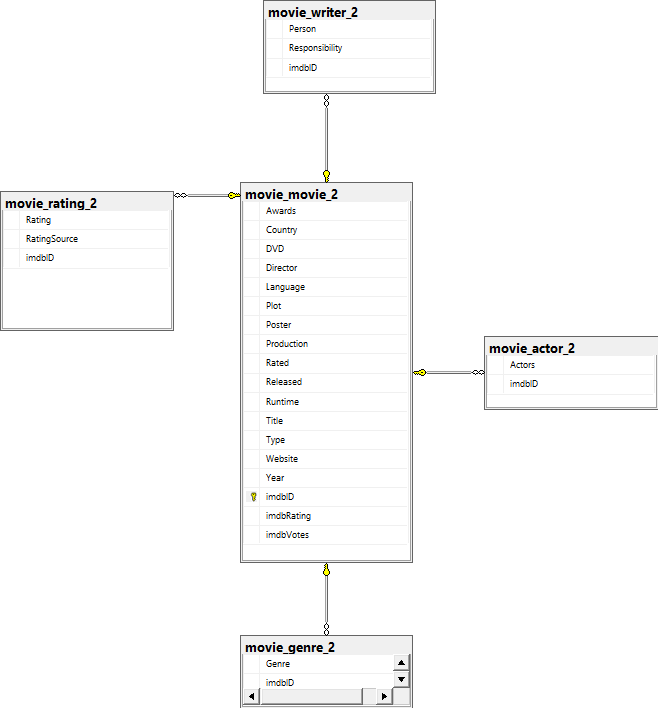

In [64]:
Image(filename='diagram.png') 